In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy.stats import skew
from scipy.stats import zscore

In [2]:
df = sns.load_dataset('tips')
df.head(2)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3


In [3]:
df['z_score'] = zscore(df['total_bill'])

In [4]:
df.head(2)

,total_bill,tip,sex,smoker,day,time,size,z_score
0,16.99,1.01,Female,No,Sun,Dinner,2,-0.314711
1,10.34,1.66,Male,No,Sun,Dinner,3,-1.063235


In [5]:
df.size

1952

#### By Zscore method

In [6]:
df[(df['z_score']>=3 ) | (df['z_score']<=-3)] #removing outliers

,total_bill,tip,sex,smoker,day,time,size,z_score
59,48.27,6.73,Male,No,Sat,Dinner,4,3.206166
156,48.17,5.00,Male,No,Sun,Dinner,6,3.194910
170,50.81,10.00,Male,Yes,Sat,Dinner,3,3.492068
212,48.33,9.00,Male,No,Sat,Dinner,4,3.212919


In [7]:
a = df[(df['z_score']<3 ) & (df['z_score']>-3)]

In [8]:
df.skew() #before removing outliers

total_bill    1.133213
tip           1.465451
size          1.447882
z_score       1.133213
dtype: float64

In [9]:
a.skew() #after removing outliers

total_bill    0.914851
tip           0.911693
size          1.454604
z_score       0.914851
dtype: float64

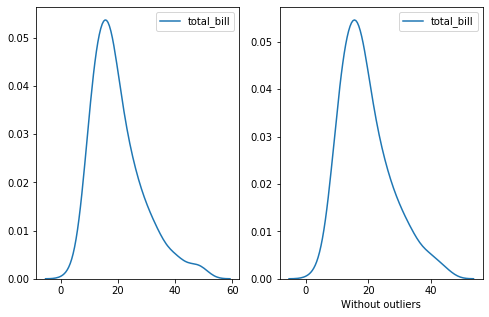

In [10]:
fig, ax=plt.subplots(1,2,figsize=(8,5))
sns.kdeplot(data=a.total_bill,ax=ax[1])
sns.kdeplot(data=df.total_bill,ax=ax[0])
plt.xlabel('Without outliers')
plt.show()

### Emperical Rule

- It holds good for only bell shaped curve
- This states that btwn 1-STD 34% data lies i.e. from 0 to 1 in perfect bell shape curve (from -1 to 1, 68%)
- Btwn 2-STD 47.5% data lies i.e. from 0 to 2 (from -2 to 2, 95%)
- Btwn 3-STD 49.85% data lies i.e. from 0 to 3 (from -3 to 3, 97.3%)
- In perfect bell shape curve 0.3% are only outliers

##### By IQR method

To remove outliers we need to calcualte upper limit(UL) and lower limit(LL) from the below formulae
- UL = Q3+1.5IQR
- LL = Q1-1.5IQR

In [11]:
df.head(2)

,total_bill,tip,sex,smoker,day,time,size,z_score
0,16.99,1.01,Female,No,Sun,Dinner,2,-0.314711
1,10.34,1.66,Male,No,Sun,Dinner,3,-1.063235


In [12]:
q1 = df['total_bill'].quantile(q=0.25)
q2 = df['total_bill'].quantile()
q3 = df['total_bill'].quantile(q=0.75)
iqr = q3-q1
ul = q3+1.5*iqr
ll = q1-1.5*iqr

In [13]:
ol = df[(df['total_bill']>ul ) | (df['total_bill']<ll)] 

In [14]:
ol.skew()

total_bill   -0.084384
tip           0.739599
size          0.537175
z_score      -0.084384
dtype: float64

In [15]:
wol = df[(df['total_bill']<ul ) | (df['total_bill']>ll)] 

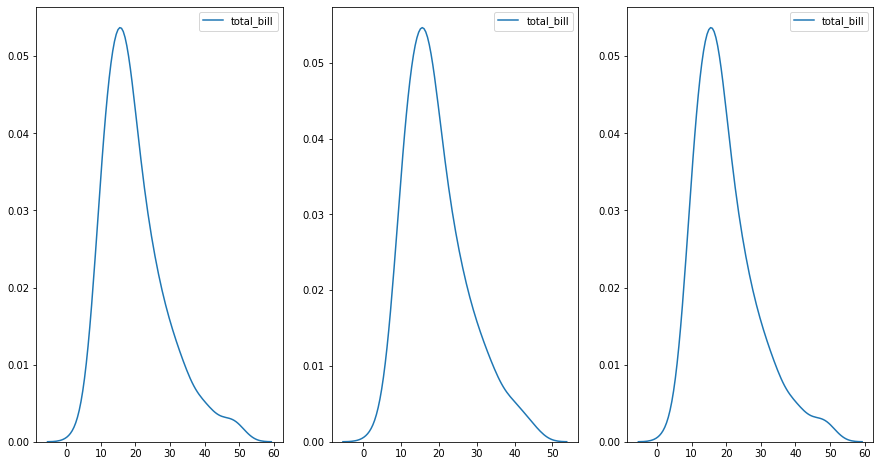

In [16]:
f, ax= plt.subplots(1,3,figsize=(15,8))
sns.kdeplot(data=a.total_bill,ax=ax[1])
sns.kdeplot(data=df.total_bill,ax=ax[0])
sns.kdeplot(data=wol.total_bill,ax=ax[2])
plt.show()

In boxplot the line at extreme end are maximum and minimum value

#### Dealing with categorical data

- encoders technique  / label encoding : is used to convert categorical to 0,1,2,... form
- Dummies / 1-hot encoding : Toget encoded data

In [17]:
df = sns.load_dataset('tips')
df.head(2)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3


In [18]:
#label encoding using replace
df['encoded_sex'] = df['sex'].replace({'Female':1,'Male':0})
#to convert type to float use astype
#df['encoded_sex'] = df['sex'].replace({'Female':1,'Male':0}).astype('float')
df.head()

,total_bill,tip,sex,smoker,day,time,size,encoded_sex
0,16.99,1.01,Female,No,Sun,Dinner,2,1
1,10.34,1.66,Male,No,Sun,Dinner,3,0
2,21.01,3.50,Male,No,Sun,Dinner,3,0
3,23.68,3.31,Male,No,Sun,Dinner,2,0
4,24.59,3.61,Female,No,Sun,Dinner,4,1


In [19]:
#label encoding using map
df['encoded_map'] = df['sex'].map({'Female':1,'Male':0})
df.head()

,total_bill,tip,sex,smoker,day,time,size,encoded_sex,encoded_map
0,16.99,1.01,Female,No,Sun,Dinner,2,1,1
1,10.34,1.66,Male,No,Sun,Dinner,3,0,0
2,21.01,3.50,Male,No,Sun,Dinner,3,0,0
3,23.68,3.31,Male,No,Sun,Dinner,2,0,0
4,24.59,3.61,Female,No,Sun,Dinner,4,1,1


In [20]:
#dummies using pandas(get_dummies)
pd.get_dummies(df['sex']).head()

sex,Male,Female
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [21]:
pd.get_dummies(df['day'],drop_first=True).head()

day,Fri,Sat,Sun
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1


In [22]:
pd.get_dummies(df,columns=['sex','time']).head()

,total_bill,tip,smoker,day,size,encoded_sex,encoded_map,sex_Male,sex_Female,time_Lunch,time_Dinner
0,16.99,1.01,No,Sun,2,1,1,0,1,0,1
1,10.34,1.66,No,Sun,3,0,0,1,0,0,1
2,21.01,3.50,No,Sun,3,0,0,1,0,0,1
3,23.68,3.31,No,Sun,2,0,0,1,0,0,1
4,24.59,3.61,No,Sun,4,1,1,0,1,0,1


In [23]:
#for scaling
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()
df['MinMax_TottalBill'] = minmax.fit_transform(df[['total_bill']])
df.head()

,total_bill,tip,sex,smoker,day,time,size,encoded_sex,encoded_map,MinMax_TottalBill
0,16.99,1.01,Female,No,Sun,Dinner,2,1,1,0.291579
1,10.34,1.66,Male,No,Sun,Dinner,3,0,0,0.152283
2,21.01,3.50,Male,No,Sun,Dinner,3,0,0,0.375786
3,23.68,3.31,Male,No,Sun,Dinner,2,0,0,0.431713
4,24.59,3.61,Female,No,Sun,Dinner,4,1,1,0.450775


In [24]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df['labelencoding_smoker'] = labelencoder.fit_transform(df['smoker'])
df.head()

,total_bill,tip,sex,smoker,day,time,size,encoded_sex,encoded_map,MinMax_TottalBill,labelencoding_smoker
0,16.99,1.01,Female,No,Sun,Dinner,2,1,1,0.291579,0
1,10.34,1.66,Male,No,Sun,Dinner,3,0,0,0.152283,0
2,21.01,3.50,Male,No,Sun,Dinner,3,0,0,0.375786,0
3,23.68,3.31,Male,No,Sun,Dinner,2,0,0,0.431713,0
4,24.59,3.61,Female,No,Sun,Dinner,4,1,1,0.450775,0


In [25]:
df.ix[0,0]

C:\Users\RasAlGhul\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.
C:\Users\RasAlGhul\Anaconda3\lib\site-packages\pandas\core\indexing.py:961: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  return getattr(section, self.name)[new_key]


16.99

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.3,random_state=0)

In [28]:
xtrain.shape

(170, 10)

In [29]:
xtest.shape

(74, 10)

In [30]:
ytrain.shape

(170,)

In [31]:
ytest.shape

(74,)

In [32]:
df.shape

(244, 11)